In [1]:
## Importing the libraries

##For preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##For model creation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNetCV, ElasticNet,LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score, precision_score
sns.set()
%matplotlib inline

In [2]:
## Now load the dataset
df = pd.read_csv('../dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.describe().T  ## Here T means Transpose

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
## Check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16676\959228523.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16676\959228523.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1

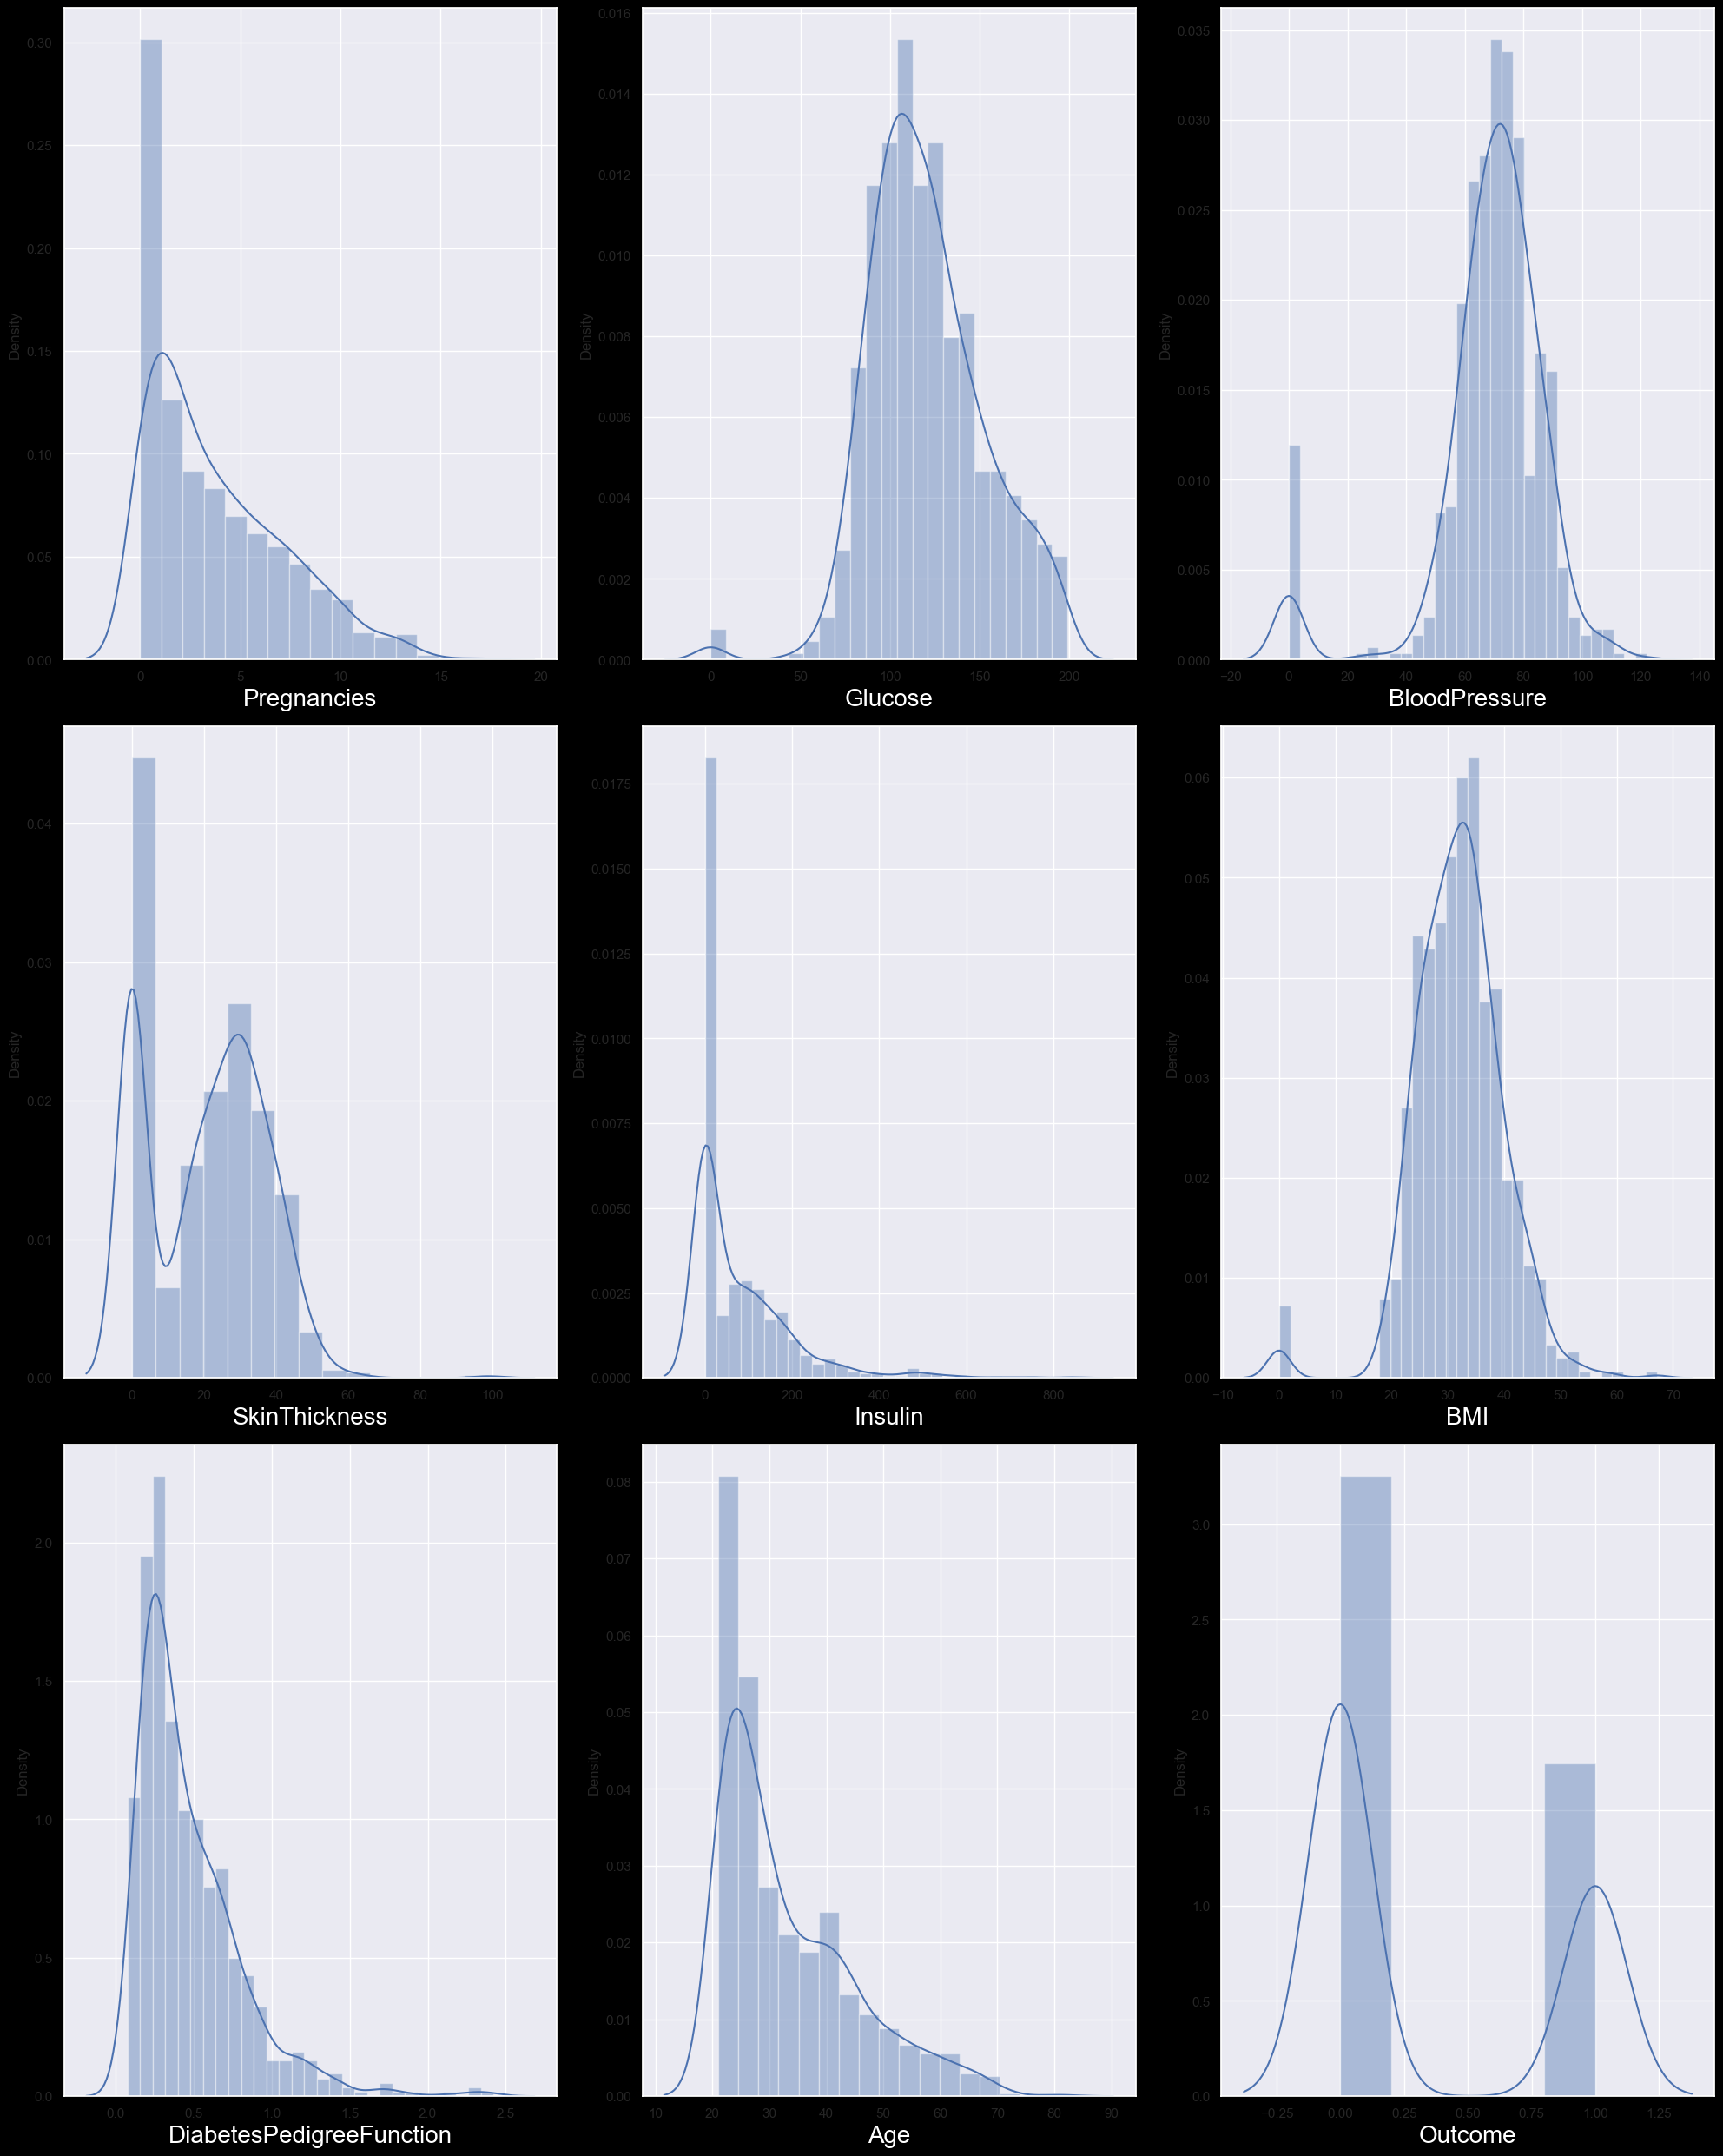

In [6]:
## Checking the distibution for each columns
plt.figure(figsize=(20,25), facecolor='black')
plotnumber = 1

for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20,color='white')
    plotnumber+=1
plt.tight_layout()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [7]:
# here replacing zero values with the mean of the columns
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16676\2461181173.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16676\2461181173.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel

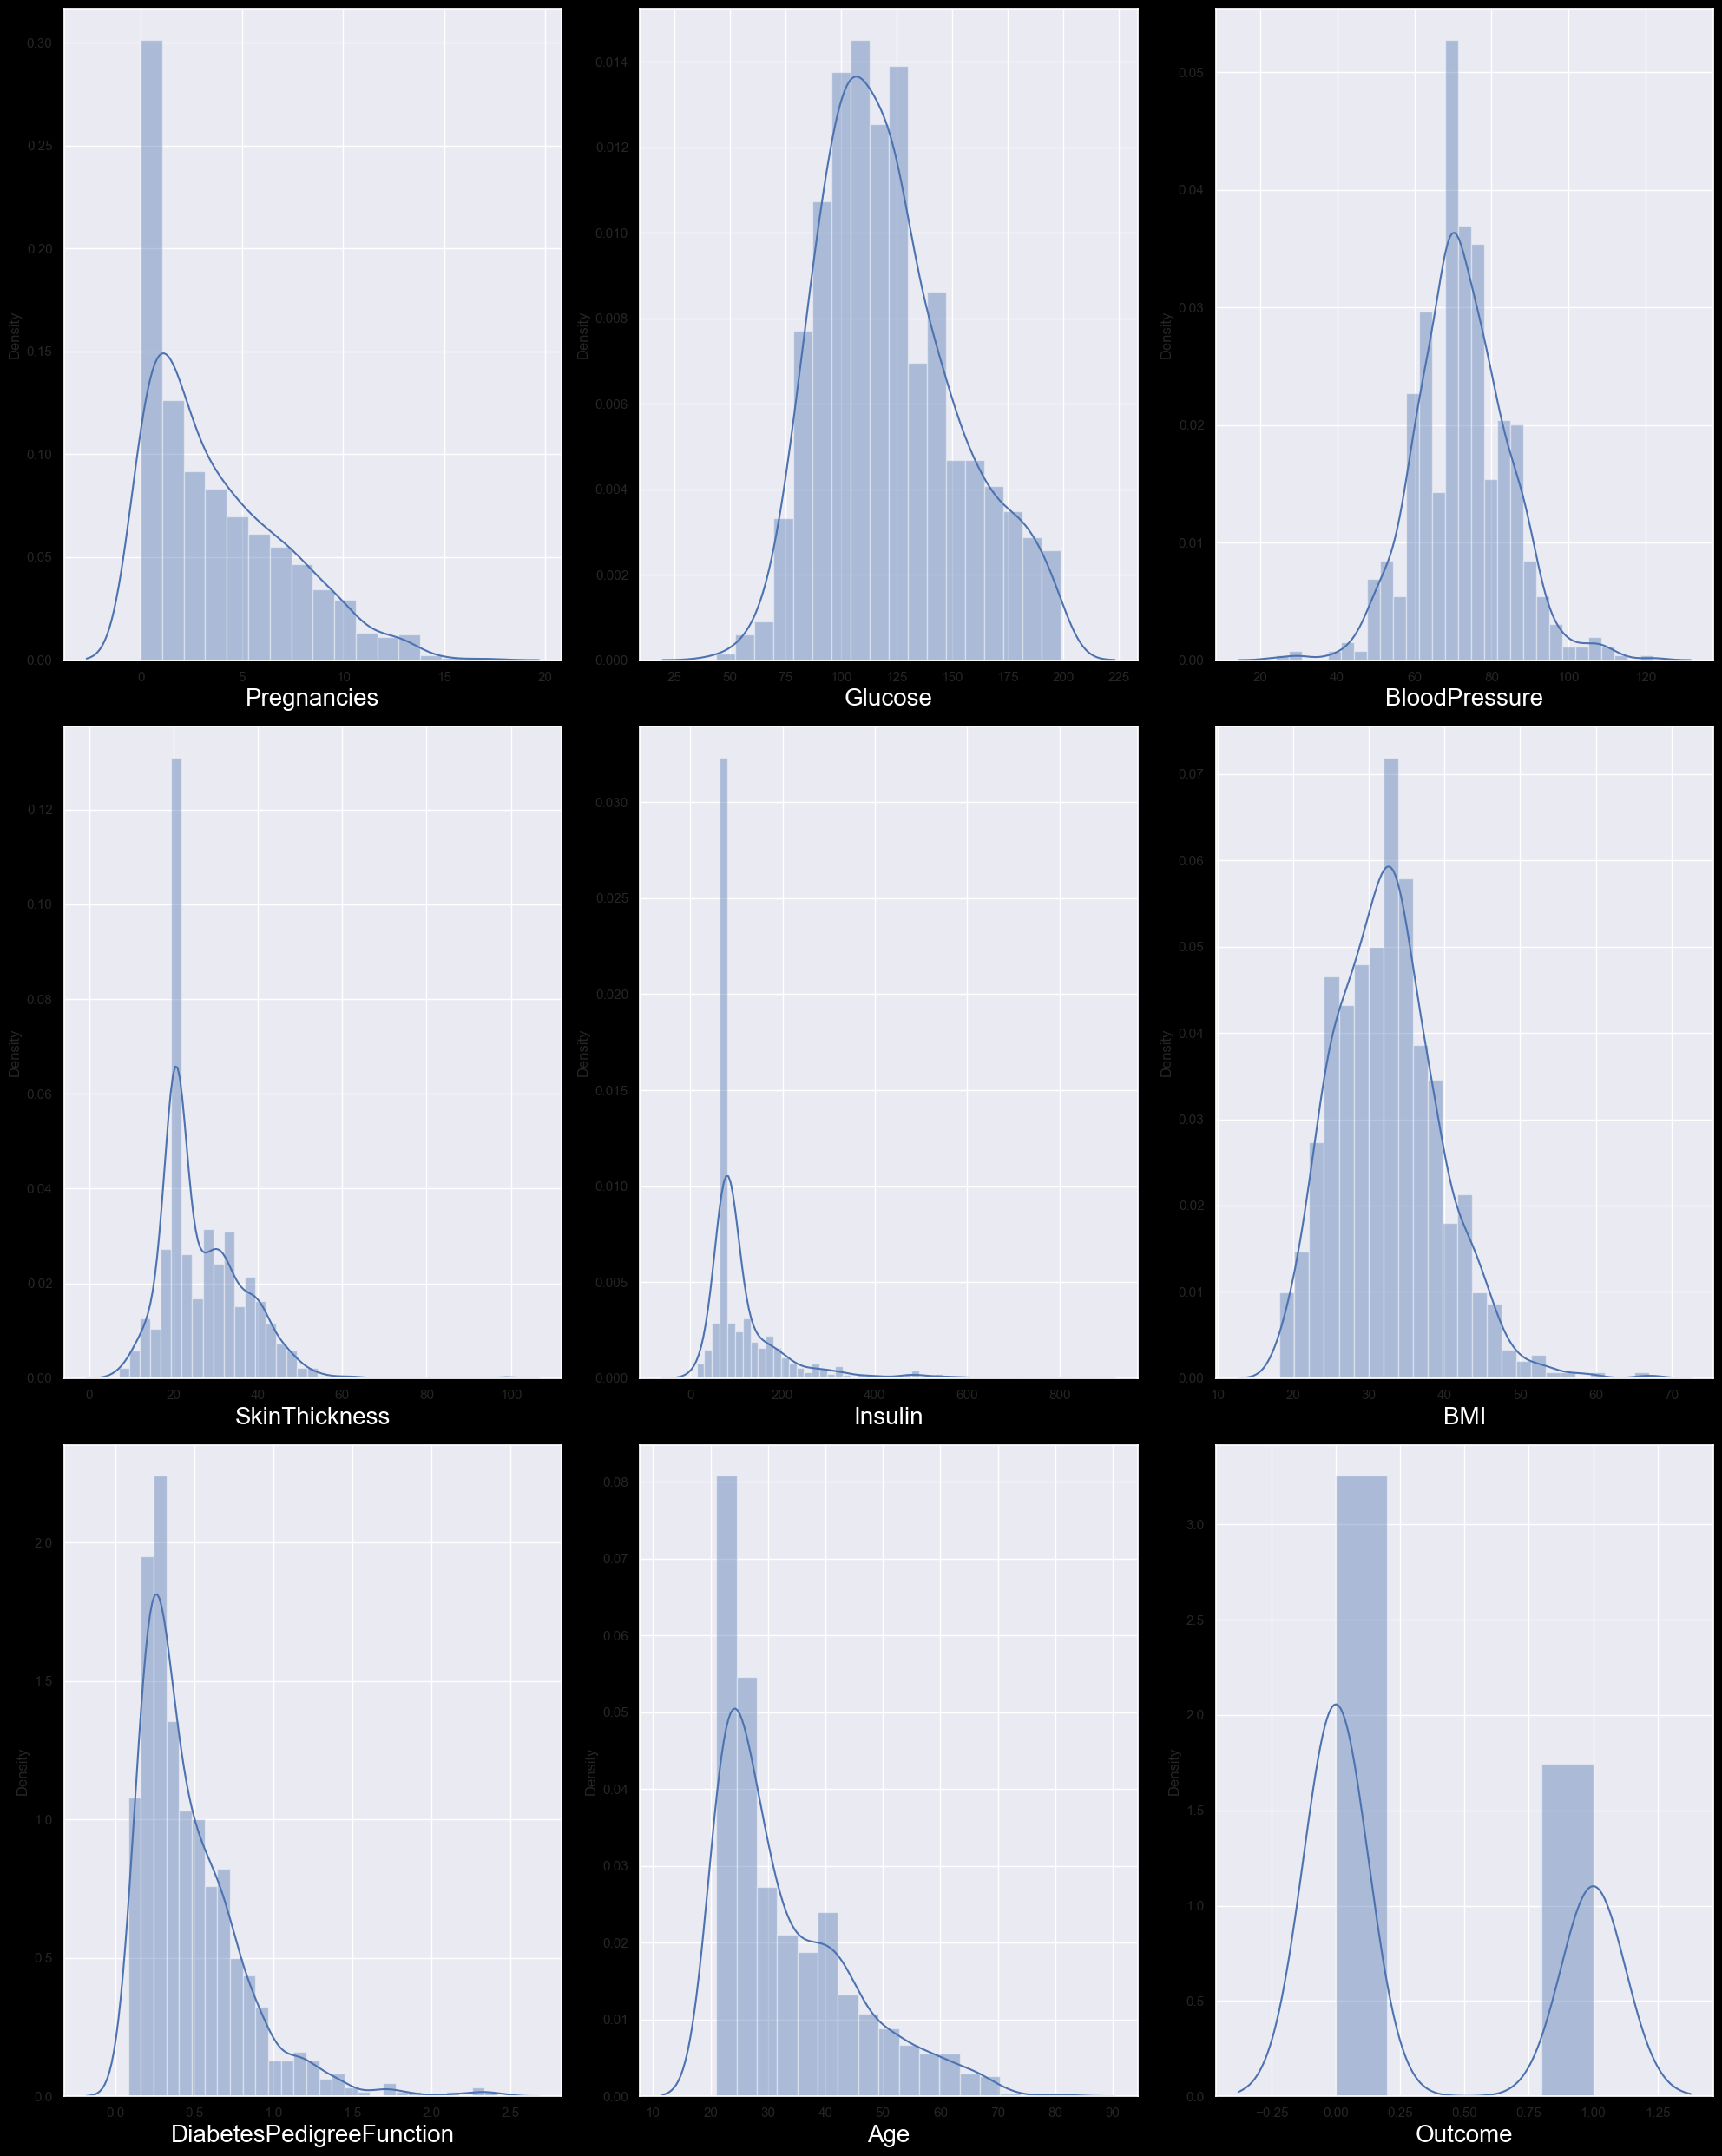

In [8]:
## Checking the again the distibution for each columns
plt.figure(figsize=(20,25), facecolor='black')
plotnumber = 1

for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20,color='white')
    plotnumber+=1
plt.tight_layout()

<Axes: >

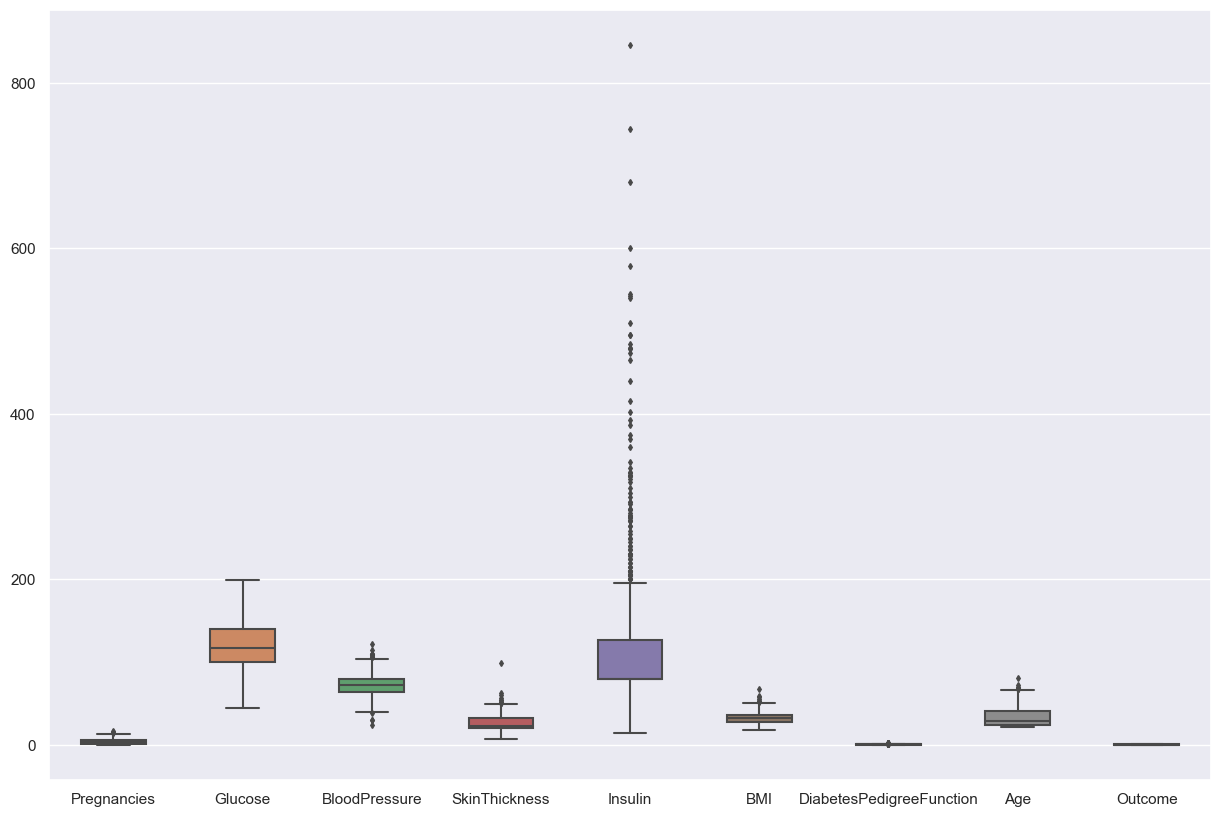

In [9]:
## Now we have dealt with the 0 values but still there are outliers which we can check using the boxplot
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = df, width = 0.5, ax = ax, fliersize=3)

In [10]:
# Let's deal with the outliers

q = df['Pregnancies'].quantile(0.98)
# Removing the top 2% data from the Pregnancies column
data_cleaned = df[df['Pregnancies']<q]

q = data_cleaned['BMI'].quantile(0.99)
# Removing the top 1% data from the BMI column
data_cleaned = df[df['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.99)
# Removing the top 1% data from the Skinthickness column
data_cleaned = df[df['SkinThickness']<q]

q = data_cleaned['Insulin'].quantile(0.99)
# Removing the top 1% data from the Insulin column
data_cleaned = df[df['Insulin']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# Removing the top 1% data from the DiabetesPedigreeFunction Column
data_cleaned = df[df['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
# Removing the top 1% data from the Age
data_cleaned = df[df['Age']<q]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16676\2702203650.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16676\2702203650.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
C:\Users\Lenovo\AppData\

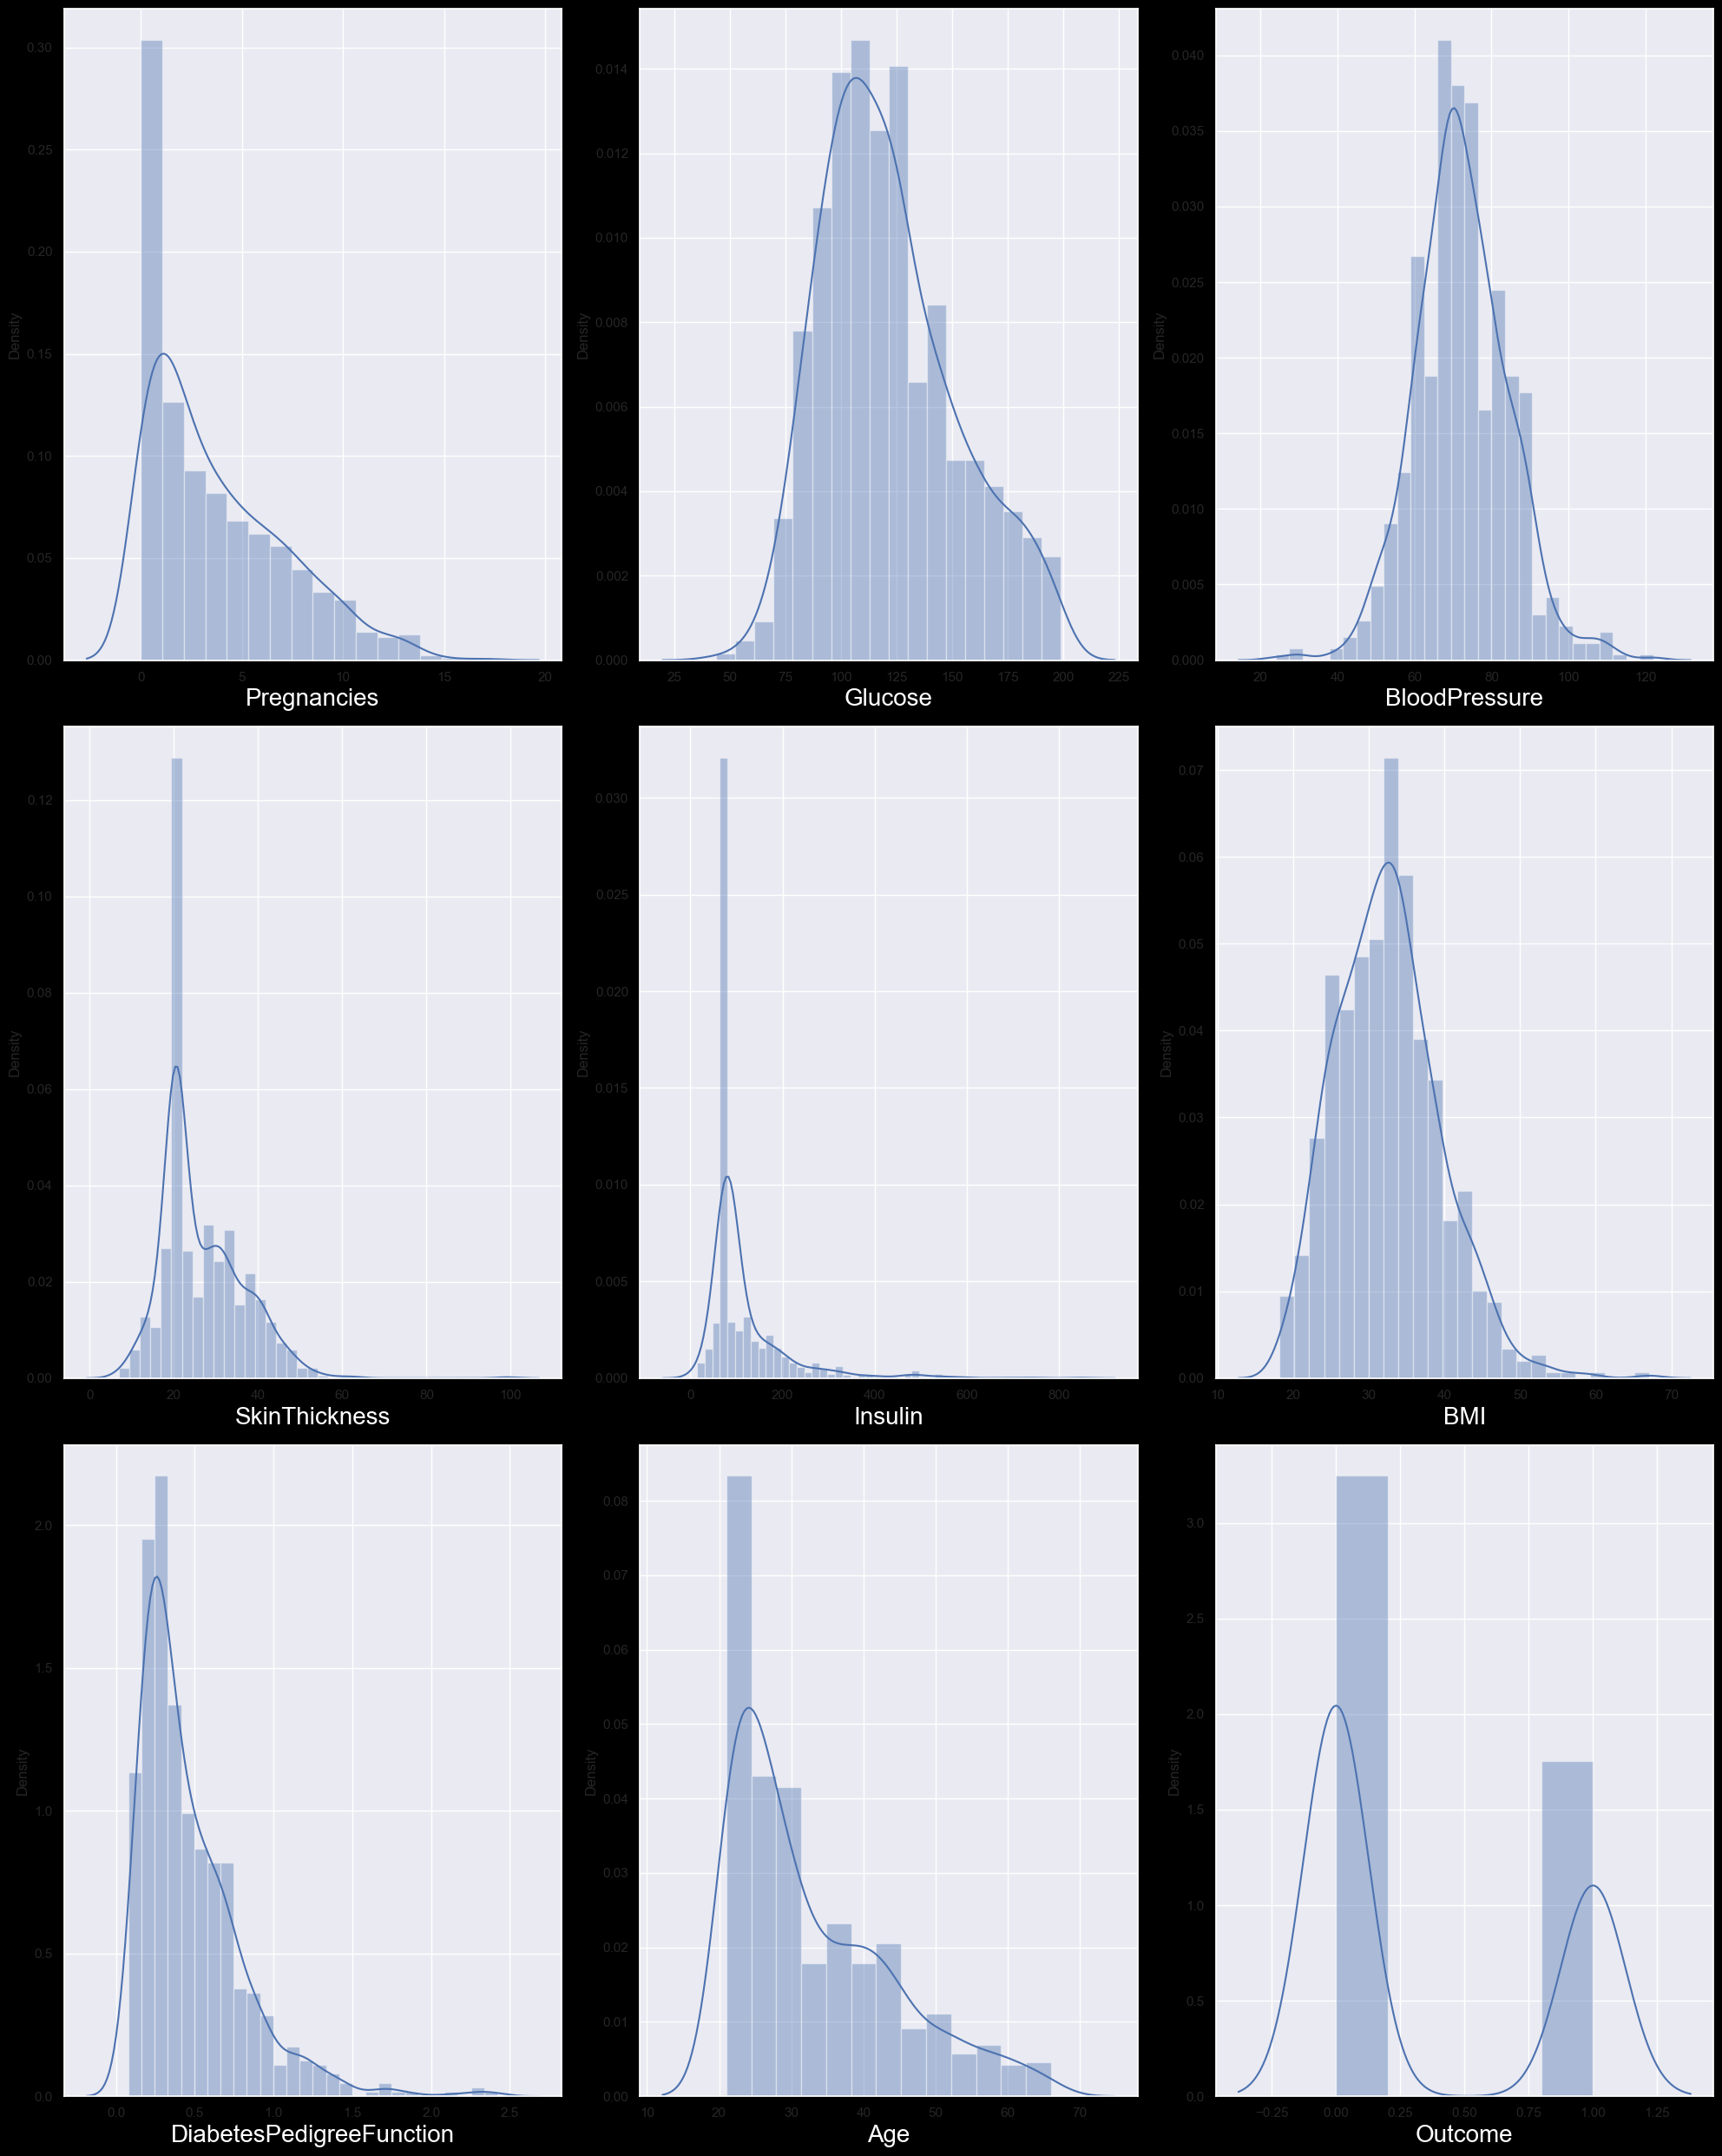

In [11]:
# Now again lets see the distribution for every column
## Checking the again the distibution for each columns
plt.figure(figsize=(20,25), facecolor='black')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize = 20,color='white')
    plotnumber+=1
plt.tight_layout()

Now, the data looks much better now than before. Starting my analysis with this data now as I don't want to loose important information. If the model doesn't work with accuracy, I will come back for more preprocessing.

<Axes: >

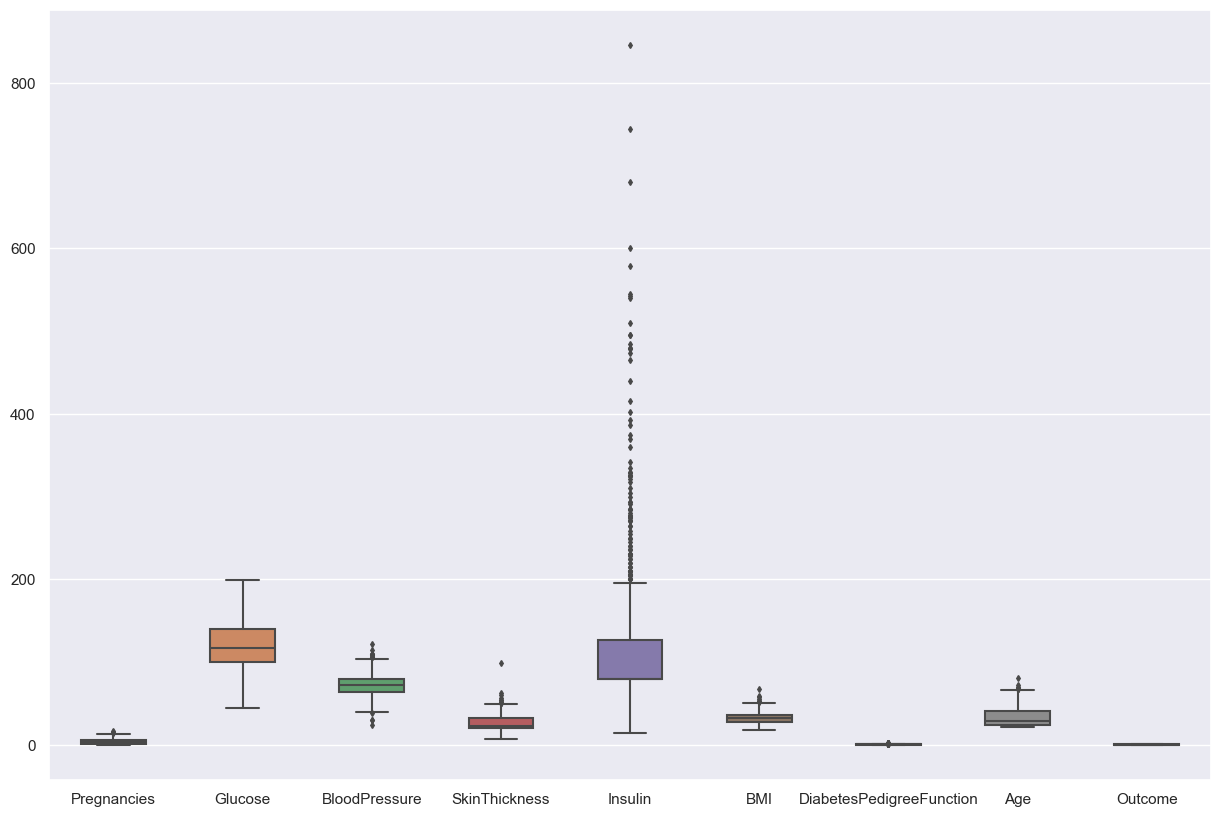

In [12]:
## Once again checking for the outliers
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = df, width = 0.5, ax = ax, fliersize=3)

In [13]:
## Making the dependent and Independent features
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [14]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

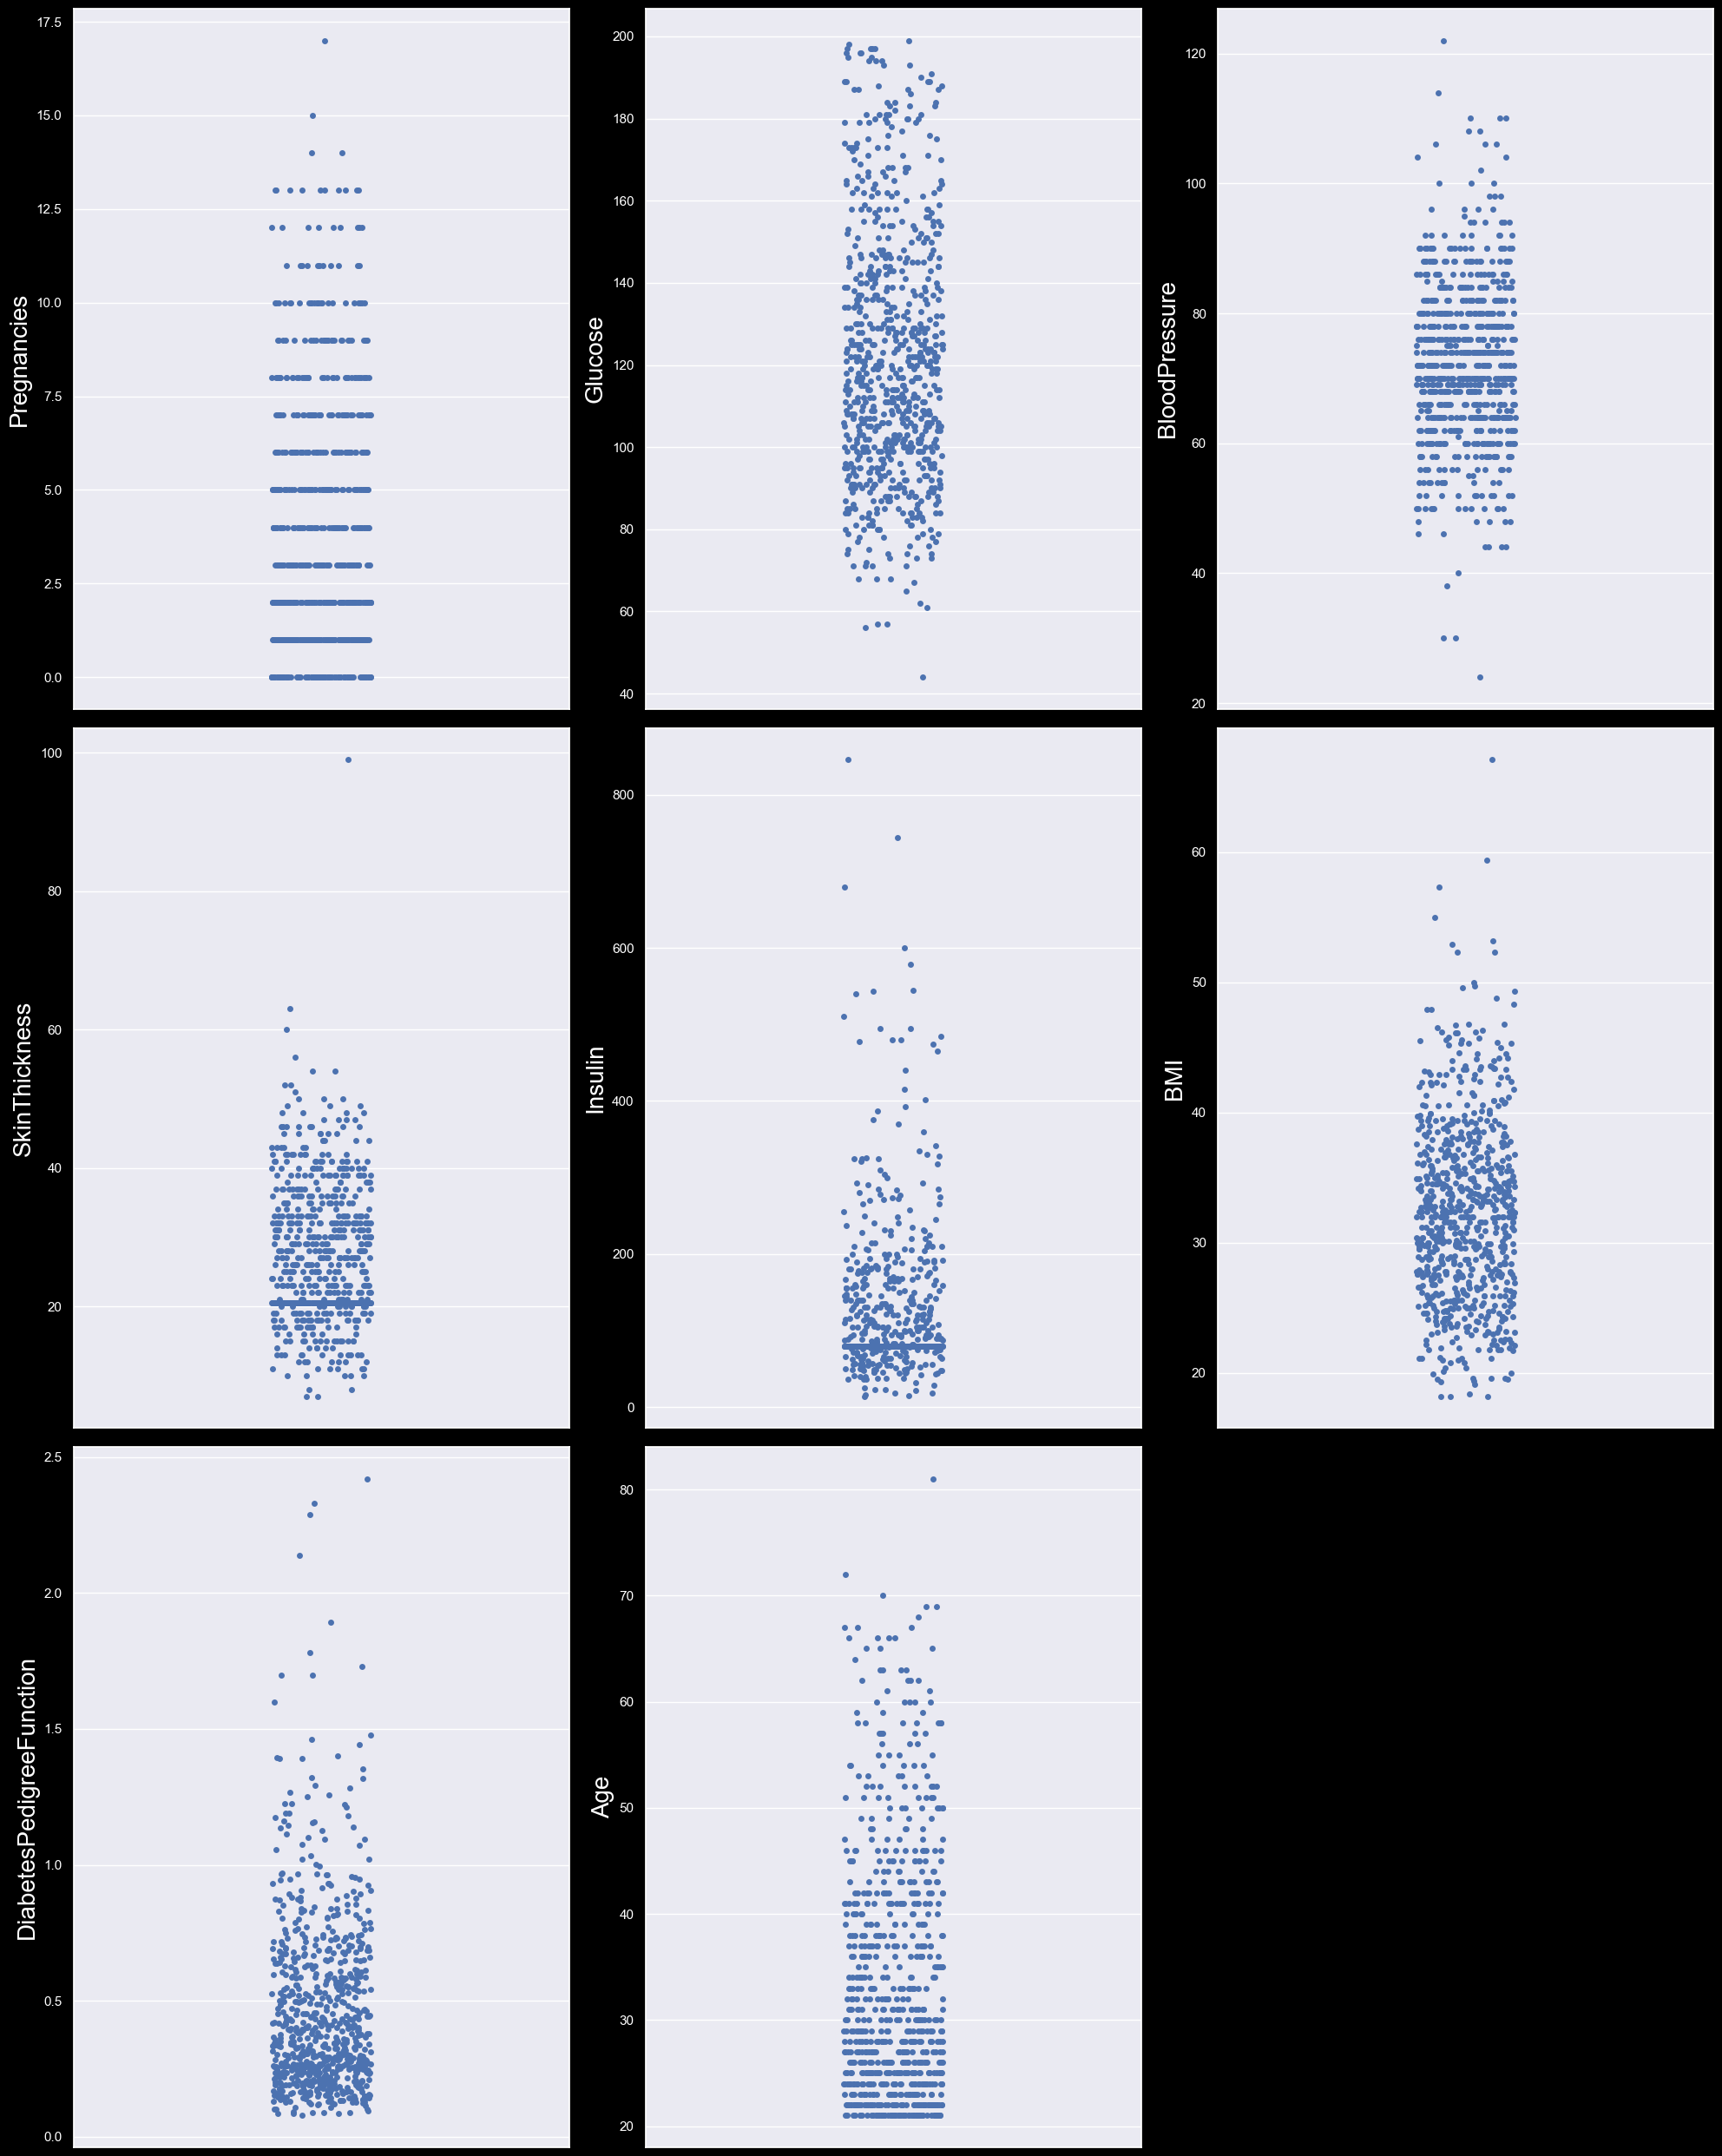

In [15]:
## Checking the again the distibution for each columns
plt.figure(figsize=(20, 25), facecolor='black')
plotnumber = 1

for column in X:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.stripplot(y=X[column])
        ax.set_ylabel(column, fontsize=20, color='white')  # Set y-axis label and font color
        ax.tick_params(axis='both', colors='white')  # Set tick label color
    plotnumber += 1

plt.tight_layout()
plt.show()

In [16]:
## Separate the training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [17]:
X_train.shape

(576, 8)

In [18]:
## Scaling the data and saving the pickle file for the standardization

import bz2, pickle

def scaler_standard(X_train,X_test):
    #Scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    ## Saving the model
    file = bz2.BZ2File('../models/standardScalar.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [19]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [20]:
## This is how our data looks after scaling the data.
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [21]:
## Model training Starts from here

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [22]:
## Let's check the r2 score

r2 = log_reg.score(X_train_scaled,y_train)
r2

0.7708333333333334

In [23]:
## Now lets check the adjusted r2
def adj_r2(x,y,r2):
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [24]:
## adj_r2

adj_r2(X_train_scaled, y_train, r2)

0.7675999412110524

In [25]:
## Here, we observe our r2 score and adj_r2 both are almost same
y_pred = log_reg.predict(X_test_scaled)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
## Checking the accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.796875

In [27]:
## Checking the confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]], dtype=int64)

In [28]:
## Precison
precision = precision_score(y_test,y_pred)
precision

0.7346938775510204

In [29]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [30]:
Precison = true_positive/(true_positive+false_positive)
Precison

0.9

In [31]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8181818181818182

In [32]:
F1_Score = 2*(Recall*Precison)/(Recall+Precison)
F1_Score

0.8571428571428572

In [33]:
auc = roc_auc_score(y_test,y_pred)
auc

0.7403225806451613

In [34]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

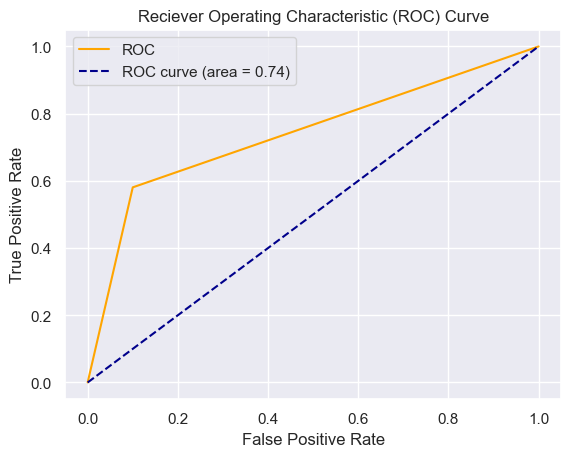

In [35]:
plt.plot(fpr,tpr,color='orange', label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic (ROC) Curve')
plt.legend()

In [36]:
## Saving the model
file = bz2.BZ2File('../models/modelForPrediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()